In [59]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from warnings import filterwarnings

filterwarnings('ignore')

In [60]:
# First we'll retrieve all the relevant csv files from the directory.
# Than we'll create a list of dataframes (one for each file) and concatenate
# them together in order to work on all the data at once.

data_files = os.listdir('csse_covid_19_data/csse_covid_19_daily_reports')
data_files = pd.Series(data_files, name='Data')
data_files = data_files[data_files.str.contains('.csv')]
data_files = data_files.sort_values()
data_files.head()

33    01-22-2020.csv
34    01-23-2020.csv
44    01-24-2020.csv
43    01-25-2020.csv
23    01-26-2020.csv
Name: Data, dtype: object

In [61]:
df_all = [pd.read_csv(f'csse_covid_19_data/csse_covid_19_daily_reports/{csv_file}') for csv_file in data_files]
len(df_all)

52

In [62]:
df = pd.concat(df_all)
df.reset_index(drop=True, inplace=True)
df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5378,NaN,Afghanistan,2020-03-11T20:00:00,7.0,0.0,0.0,33.0000,65.0000
5379,NaN,Monaco,2020-03-11T20:00:00,2.0,0.0,0.0,43.7333,7.4167
5380,NaN,Liechtenstein,2020-03-11T20:00:00,1.0,0.0,0.0,47.1400,9.5500
5381,NaN,Guyana,2020-03-11T20:00:00,1.0,1.0,0.0,5.0000,-58.7500


In [63]:
df['Last Update'] = pd.to_datetime(df['Last Update'])

df['Date Last Updated'] = df['Last Update'].dt.date
df['Time Last Updated'] = df['Last Update'].dt.time

df = df[['Province/State', 'Country/Region', 'Date Last Updated', 'Time Last Updated' ,'Confirmed', 'Deaths', 'Recovered', 'Latitude', 'Longitude']]
df

,Province/State,Country/Region,Date Last Updated,Time Last Updated,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Anhui,Mainland China,2020-01-22,17:00:00,1.0,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,2020-01-22,17:00:00,14.0,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,2020-01-22,17:00:00,6.0,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,2020-01-22,17:00:00,1.0,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,2020-01-22,17:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5378,NaN,Afghanistan,2020-03-11,20:00:00,7.0,0.0,0.0,33.0000,65.0000
5379,NaN,Monaco,2020-03-11,20:00:00,2.0,0.0,0.0,43.7333,7.4167
5380,NaN,Liechtenstein,2020-03-11,20:00:00,1.0,0.0,0.0,47.1400,9.5500
5381,NaN,Guyana,2020-03-11,20:00:00,1.0,1.0,0.0,5.0000,-58.7500


In [64]:
df.isnull().sum()

Province/State       2041
Country/Region          0
Date Last Updated       0
Time Last Updated       0
Confirmed              19
Deaths                441
Recovered             388
Latitude             2818
Longitude            2818
dtype: int64

In [65]:
world_wide = df.groupby('Date Last Updated').sum().copy()
world_wide.drop(columns=['Latitude', 'Longitude'], inplace=True)
# world_wide.reset_index(inplace=True)
world_wide.head()

,Confirmed,Deaths,Recovered
Date Last Updated,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [66]:
world_wide.isnull().sum()

Confirmed    0
Deaths       0
Recovered    0
dtype: int64

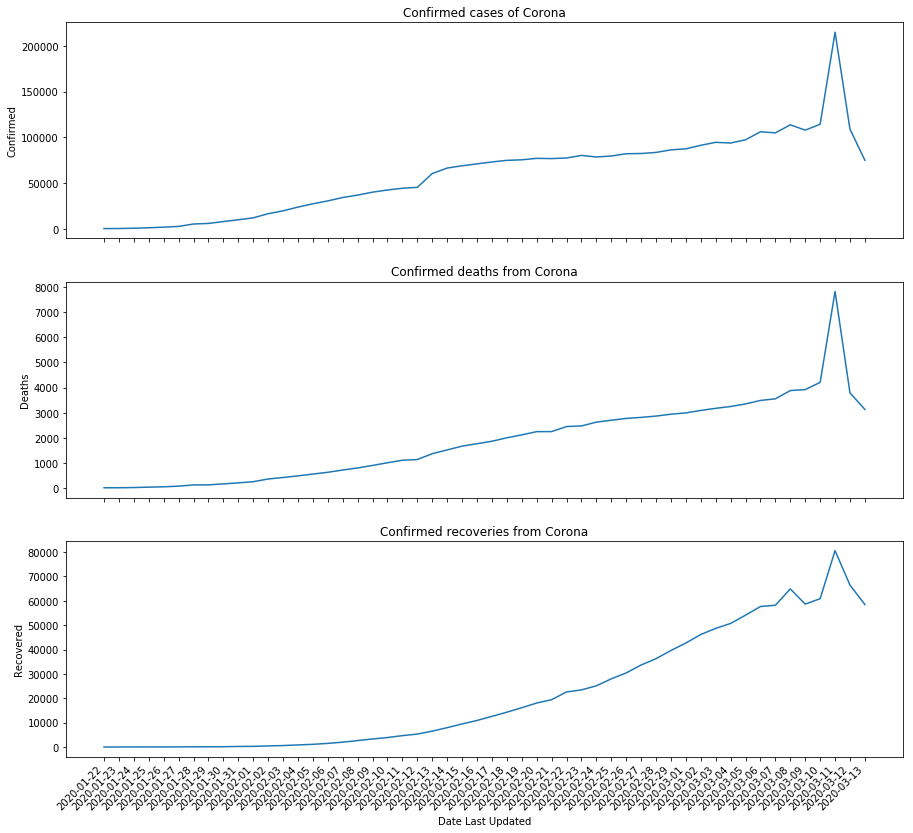

In [67]:
fig, axes = plt.subplots(3,1, figsize=(15,15))
fig.autofmt_xdate(rotation=45)

sns.lineplot(x=world_wide.index, y='Confirmed', data=world_wide, ax=axes[0])
axes[0].xaxis.set_ticks(world_wide.index)
axes[0].set_title('Confirmed cases of Corona')

sns.lineplot(x=world_wide.index, y='Deaths', data=world_wide, ax=axes[1])
axes[1].xaxis.set_ticks(world_wide.index)
axes[1].set_title('Confirmed deaths from Corona')

sns.lineplot(x=world_wide.index, y='Recovered', data=world_wide, ax=axes[2])
axes[2].xaxis.set_ticks(world_wide.index);
axes[2].set_title('Confirmed recoveries from Corona');

## Track the growth by country

In [98]:
country_counts = df['Country/Region'].value_counts().to_dict()

for country in sorted(country_counts.keys()):
    print(country, country_counts[country])

 Azerbaijan 1
Afghanistan 19
Albania 5
Algeria 18
Andorra 12
Antigua and Barbuda 1
Argentina 11
Armenia 13
Aruba 1
Australia 242
Austria 18
Azerbaijan 13
Bahrain 19
Bangladesh 6
Belarus 15
Belgium 39
Bhutan 8
Bolivia 3
Bosnia and Herzegovina 9
Brazil 18
Brunei 5
Bulgaria 6
Burkina Faso 4
Cambodia 47
Cameroon 8
Canada 159
Cayman Islands 1
Channel Islands 1
Chile 11
China 99
Colombia 9
Congo (Kinshasa) 3
Costa Rica 8
Cote d'Ivoire 3
Croatia 18
Cruise Ship 3
Cuba 2
Cyprus 5
Czech Republic 10
Czechia 3
Denmark 19
Dominican Republic 13
Ecuador 13
Egypt 29
Estonia 16
Ethiopia 1
Faroe Islands 7
Finland 45
France 57
French Guiana 7
Georgia 17
Germany 46
Gibraltar 7
Greece 17
Guadeloupe 1
Guinea 1
Guyana 2
Holy See 4
Honduras 3
Hong Kong 48
Hong Kong SAR 1
Hungary 10
Iceland 15
India 44
Indonesia 12
Iran 23
Iran (Islamic Republic of) 1
Iraq 20
Ireland 14
Israel 22
Italy 43
Ivory Coast 1
Jamaica 3
Japan 52
Jordan 11
Kazakhstan 1
Kenya 1
Korea, South 3
Kuwait 19
Latvia 12
Lebanon 22
Liechtenstein

In [102]:
df[df['Country/Region']  == 'US'].groupby('Province/State').get_group('Washington')

,Province/State,Country/Region,Date Last Updated,Time Last Updated,Confirmed,Deaths,Recovered,Latitude,Longitude
31,Washington,US,2020-01-22,17:00:00,1.0,NaN,NaN,NaN,NaN
69,Washington,US,2020-01-23,17:00:00,1.0,NaN,NaN,NaN,NaN
117,Washington,US,2020-01-24,17:00:00,1.0,NaN,NaN,NaN,NaN
158,Washington,US,2020-01-25,17:00:00,1.0,NaN,NaN,NaN,NaN
202,Washington,US,2020-01-26,16:00:00,1.0,NaN,NaN,NaN,NaN
249,Washington,US,2020-01-27,23:59:00,1.0,NaN,NaN,NaN,NaN
300,Washington,US,2020-01-28,23:00:00,1.0,NaN,NaN,NaN,NaN
352,Washington,US,2020-01-29,19:30:00,1.0,NaN,NaN,NaN,NaN
407,Washington,US,2020-01-30,16:00:00,1.0,NaN,NaN,NaN,NaN
483,Washington,US,2020-01-31,23:59:00,1.0,NaN,NaN,NaN,NaN
